In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings("ignore")  # 忽略一些警告信息

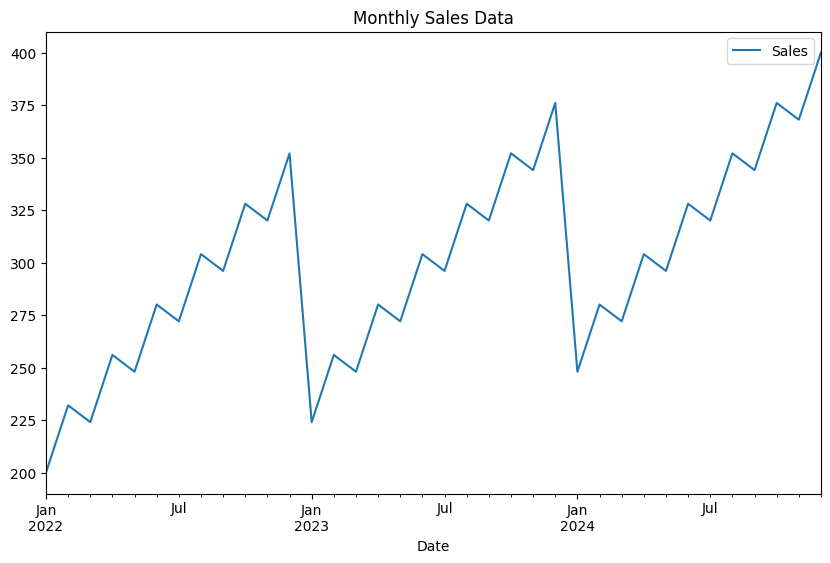

In [2]:
# 创建一个日期范围，并生成一些随机销售数据
dates = pd.date_range(start='2022-01-01', periods=36, freq='M')
sales = [200 + i * 2 + (i % 12) * 10 + (20 * (i % 2)) for i in range(36)]  # 模拟趋势和季节性数据

data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)

# 可视化时间序列
data.plot(figsize=(10, 6))
plt.title('Monthly Sales Data')
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Sales'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] < 0.05:
    print("数据是平稳的，可以直接建模。")
else:
    print("数据非平稳，需要进行差分处理。")

ADF Statistic: -2.113474030942896
p-value: 0.239131255735124
数据非平稳，需要进行差分处理。


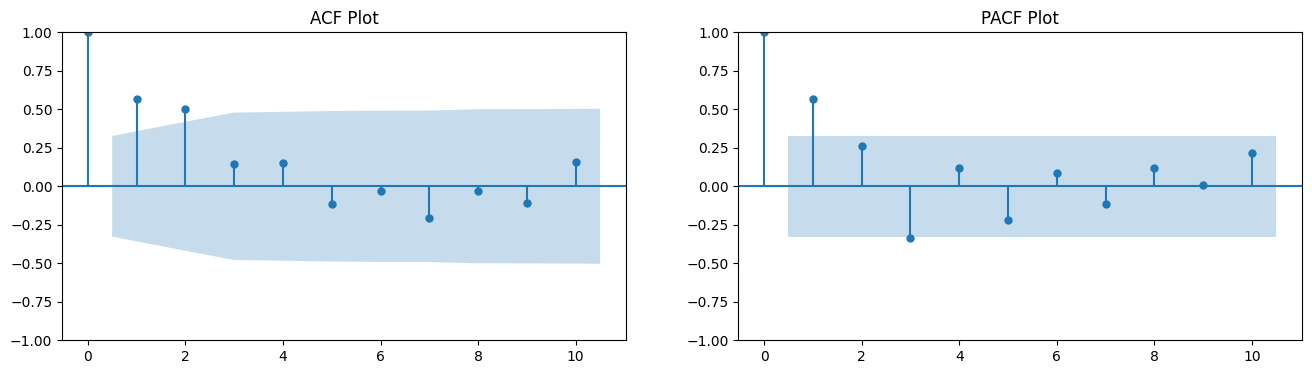

In [5]:
# 根据数据量调整滞后阶数，确保不超过样本量的一半
sample_size = len(data)
max_lag = min(10, sample_size // 2)  # 确保 nlags 不超过样本数的一半

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF 和 PACF 绘图
plot_acf(data['Sales'], lags=max_lag, ax=axes[0])
axes[0].set_title('ACF Plot')

plot_pacf(data['Sales'], lags=max_lag, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

In [6]:
# 构建 ARIMA(1,1,1) 模型
model = ARIMA(data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# 查看模型摘要
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -167.793
Date:                Thu, 24 Oct 2024   AIC                            341.587
Time:                        11:37:59   BIC                            346.253
Sample:                    01-31-2022   HQIC                           343.198
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.000  -2513.085      0.000      -1.001      -0.999
ma.L1          0.9979      0.180      5.554      0.000       0.646       1.350
sigma2       774.0629      0.000   3.28e+06      0.0

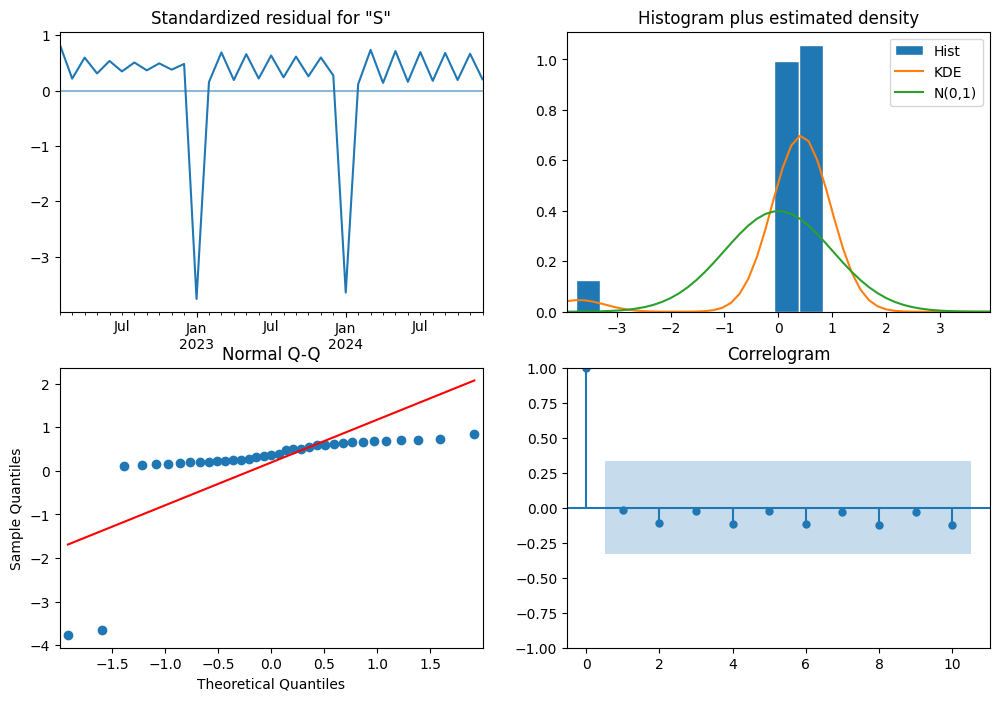

In [7]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

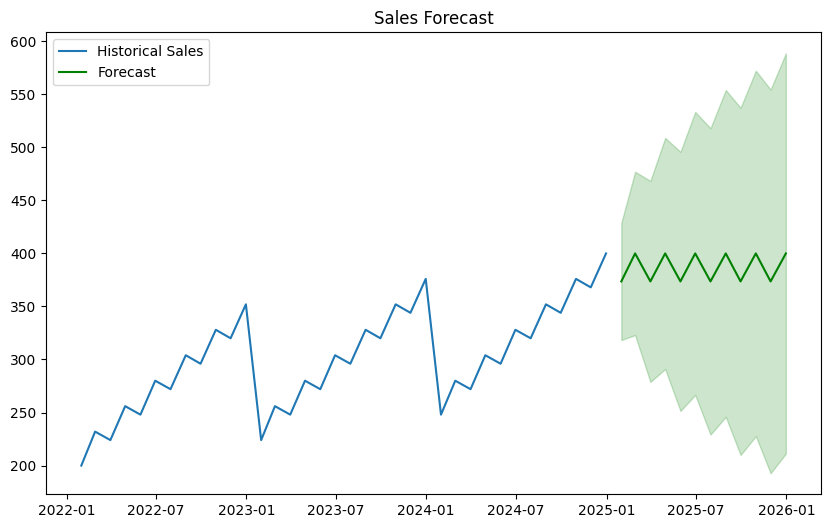

In [8]:
# 预测未来12个月的销售数据
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start='2025-01-01', periods=12, freq='M')
forecast_df = forecast.summary_frame()

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(forecast_index, forecast_df['mean'], label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='green', alpha=0.2)
plt.legend()
plt.title('Sales Forecast')
plt.show()